
# Plotting with Geoplot and GeoPandas

[Geoplot](https://residentmario.github.io/geoplot/index.html) is a Python
library providing a selection of easy-to-use geospatial visualizations. It is
built on top of the lower-level [CartoPy](http://scitools.org.uk/cartopy/),
covered in a separate section of this tutorial, and is designed to work with
GeoPandas input.

This example is a brief tour of the `geoplot` API. For more details on the
library refer to [its documentation](https://residentmario.github.io/geoplot/index.html).

First we'll load in the data using GeoPandas.

But first first, can you add a cell block below to use pip to install the `geoplot` package?


In [1]:
!pip install geoplot

In [2]:
import geopandas
import geodatasets
import geoplot

world = geopandas.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
boroughs = geopandas.read_file(geoplot.datasets.get_path("nyc_boroughs"))
collisions = geopandas.read_file(geoplot.datasets.get_path("nyc_injurious_collisions"))

Plotting with Geoplot
=====================

We start out by replicating the basic GeoPandas world plot using Geoplot.



In [5]:
world = world.explode()
world

C:\Users\elisec\AppData\Local\Temp\ipykernel_21140\461904790.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  world = world.explode()


featurecla  scalerank  LABELRANK                   SOVEREIGNT  \
0   0  Admin-0 country          1          6                         Fiji   
    1  Admin-0 country          1          6                         Fiji   
    2  Admin-0 country          1          6                         Fiji   
1   0  Admin-0 country          1          3  United Republic of Tanzania   
2   0  Admin-0 country          1          7               Western Sahara   
...                ...        ...        ...                          ...   
172 0  Admin-0 country          1          5           Republic of Serbia   
173 0  Admin-0 country          1          6                   Montenegro   
174 0  Admin-0 country          1          6                       Kosovo   
175 0  Admin-0 country          1          5          Trinidad and Tobago   
176 0  Admin-0 country          1          3                  South Sudan   

      SOV_A3  ADM0_DIF  LEVEL               TYPE TLC  \
0   0    FJI         0      2  Sovereign country   1   
    1    FJI         0      2  Sovereign country   1   
    2    FJI         0      2  Sovereign country   1   
1   0    TZA         0      2  Sovereign country   1   
2   0    SAH         0      2      Indeterminate   1   
...      ...       ...    ...                ...  ..   
172 0    SRB         0      2  Sovereign country   1   
173 0    MNE         0      2  Sovereign country   1   
174 0    KOS         0      2           Disputed   1   
175 0    TTO         0      2  Sovereign country   1   
176 0    SDS         0      2  Sovereign country   1   

                             ADMIN  ...        FCLASS_TR     FCLASS_ID  \
0   0                         Fiji  ...             None          None   
    1                         Fiji  ...             None          None   
    2                         Fiji  ...             None          None   
1   0  United Republic of Tanzania  ...             None          None   
2   0               Western Sahara  ...     Unrecognized  Unrecognized   
...                            ...  ...              ...           ...   
172 0           Republic of Serbia  ...             None          None   
173 0                   Montenegro  ...             None          None   
174 0                       Kosovo  ...  Admin-0 country  Unrecognized   
175 0          Trinidad and Tobago  ...             None          None   
176 0                  South Sudan  ...             None          None   

             FCLASS_PL     FCLASS_GR        FCLASS_IT        FCLASS_NL  \
0   0             None          None             None             None   
    1             None          None             None             None   
    2             None          None             None             None   
1   0             None          None             None             None   
2   0     Unrecognized          None             None     Unrecognized   
...                ...           ...              ...              ...   
172 0             None          None             None             None   
173 0             None          None             None             None   
174 0  Admin-0 country  Unrecognized  Admin-0 country  Admin-0 country   
175 0             None          None             None             None   
176 0             None          None             None             None   

             FCLASS_SE        FCLASS_BD     FCLASS_UA  \
0   0             None             None          None   
    1             None             None          None   
    2             None             None          None   
1   0             None             None          None   
2   0             None             None          None   
...                ...              ...           ...   
172 0             None             None          None   
173 0             None             None          None   
174 0  Admin-0 country  Admin-0 country  Unrecognized   
175 0             None             None          None   
176 0    

<Axes: >

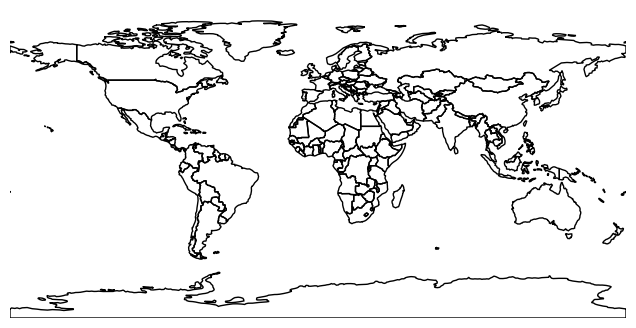

In [6]:
geoplot.polyplot(world, figsize=(8, 4))

Geoplot can re-project data into any of the map projections provided by
CartoPy (see the list
[here](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html)).



C:\Users\elisec\.conda\envs\geopandas\lib\site-packages\geoplot\geoplot.py:703: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  warnings.warn(


AttributeError: 'GeoAxes' object has no attribute 'outline_patch'

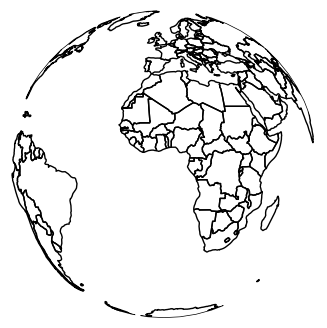

In [11]:
# use the Orthographic map projection (e.g. a world globe)
ax = geoplot.polyplot(world, projection=geoplot.crs.Orthographic(), figsize=(8, 4))
ax.outline_patch.set_visible(True)

``polyplot`` is trivial and can only plot the geometries you pass to it. If
you want to use color as a visual variable, specify a ``choropleth``. Here
we sort GDP per person by country into five buckets by color, using
"quantiles" binning from the [Mapclassify](https://pysal.org/mapclassify/)
library.



In [8]:
import mapclassify

gpd_per_person = world["gdp_md_est"] / world["pop_est"]
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme, cmap="Greens", figsize=(8, 4)
)

KeyError: 'gdp_md_est'

If you want to use size as a visual variable, use a ``cartogram``. Here are
population estimates for countries in Africa.



In [9]:
africa = world.query('continent == "Africa"')
ax = geoplot.cartogram(
    africa, scale="pop_est", limits=(0.2, 1), edgecolor="None", figsize=(7, 8)
)
geoplot.polyplot(africa, edgecolor="gray", ax=ax)

UndefinedVariableError: name 'continent' is not defined

If we have data in the shape of points in space, we may generate a
three-dimensional heatmap on it using ``kdeplot``.



C:\Users\elisec\.conda\envs\geopandas\lib\site-packages\geoplot\geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


AttributeError: 'PlateCarree' object has no attribute 'contains_branch_seperately'

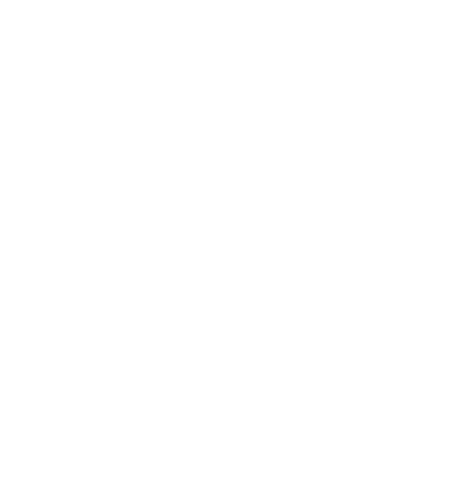

In [10]:
ax = geoplot.kdeplot(
    collisions.head(1000),
    clip=boroughs.geometry,
    shade=True,
    cmap="Reds",
    projection=geoplot.crs.AlbersEqualArea(),
)
geoplot.polyplot(boroughs, ax=ax, zorder=1)

These are just some of the plots you can make with Geoplot. There are
many other possibilities not covered in this brief introduction. For more
examples, refer to the
[Gallery](https://residentmario.github.io/geoplot/gallery/index.html) in
the Geoplot documentation.

